# #005 - Statistical Analysis for Multiple Stocks

On this code, we perform some statistical analisys, from data obtained from #004. 
Finaly we plot some graphics as correlation, scatterplots and histograms.

For future: automate lists to run any given stocks

Link to Seaborn Documentation: https://seaborn.pydata.org/

Install Libs.
    (remove comments '#' if need to install the libraries)

In [1]:
#    !pip install pandas
#    !pip install pandas-datareader
#    !pip install numpy
#    !pip install yfinance
#    !pip install datetime
#    !pip install plotly_express
#    !pip install seaborn
#    !pip install matplotlib

In [2]:
#import Libraries
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import yfinance as yf
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns


### Define functions

In [3]:
# Function to scale stock prices based on their initial starting price
# The objective of this function is to set all prices to start at a value of 1 
def price_scaling(raw_prices_df):
    scaled_prices_df = raw_prices_df.copy()
    for i in raw_prices_df.columns[0:]:
          scaled_prices_df[i] = raw_prices_df[i]/raw_prices_df[i][0]
    return scaled_prices_df

In [4]:
# Define a function using Plotly Express
def plotly_data(df, title):  
    
    # Create figure
    fig = go.Figure()
   
    # Set title
    fig.update_layout(title_text = title) 
    
    # For loop that plots all stock prices in the pandas dataframe df
    
    for i in df.columns[0:]:
        # Add range slider
        #fig.update_layout(xaxis=dict(rangeselector = dict(buttons=list([dict(count=1, label="1m", step="month", stepmode="backward"), dict(count=6, label="6m", step="month", stepmode="backward"), dict(count=1, label="YTD", step="year", stepmode="todate"), dict(count=1, label="1y", step="year", stepmode="backward"), dict(step="all")])), rangeslider=dict( visible=True), type="date"))
        # Add line graph
        fig.add_scatter(x = df.index, y = df[i], name = i)
        # Update Layout
        fig.update_layout({'plot_bgcolor': "white"})
        #fig.update_traces(line_width = 3)
    
    fig.show()
    
# Define a function using Plotly Express, changes axis y to logarithm scale
def log_plotly_data(df, title):  
    
    # Create figure
    fig = go.Figure()
   
    # Set title
    fig.update_layout(title_text = title) 
    
    # For loop that plots all stock prices in the pandas dataframe df
    
    for i in df.columns[0:]:
        # Add range slider
        #fig.update_layout(xaxis=dict(rangeselector = dict(buttons=list([dict(count=1, label="1m", step="month", stepmode="backward"), dict(count=6, label="6m", step="month", stepmode="backward"), dict(count=1, label="YTD", step="year", stepmode="todate"), dict(count=1, label="1y", step="year", stepmode="backward"), dict(step="all")])), rangeslider=dict( visible=True), type="date"))
        # Add line graph
        fig.add_scatter(x = df.index, y = df[i], name = i)
        # Update Layout
        fig.update_layout({'plot_bgcolor': "white"})
    
    #changes y to logarithm scale
    fig.update_yaxes(type="log")
    fig.show()    

## 5.1 Import and Organize Data

In [5]:
# input stocks and organize into a List Object, 
tickers = [item for item in input("Enter the stock tickers, for portfolio (space them only) : ").split()]   
#   PETR4.SA VALE3.SA TAEE11.SA ITSA4.SA WEGE3.SA
#   AAPL AMZN GOOG META MSFT NVDA TSLA

yf.pdr_override()

# define a data range, 
end = dt.datetime.now()
start = end - dt.timedelta(days = 365*10)

Enter the stock tickers, for portfolio (space them only) : AAPL AMZN GOOG META MSFT NVDA TSLA


In [6]:
#obtain data from YFinance
df = pdr.get_data_yahoo(tickers, start = start, end = end)
df

[*********************100%%**********************]  7 of 7 completed


Adj Close                                                  \
                  AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2013-12-13   17.359430   19.212000   26.420719   53.320000   30.895048   
2013-12-16   17.455557   19.448500   26.724331   53.810001   31.063459   
2013-12-17   17.376966   19.382500   26.646622   54.860001   30.751888   
2013-12-18   17.244839   19.798000   27.017483   55.570000   30.802433   
2013-12-19   17.047266   19.759501   27.054094   55.049999   30.524549   
...                ...         ...         ...         ...         ...   
2023-12-04  189.429993  144.839996  130.630005  320.019989  369.140015   
2023-12-05  193.419998  146.880005  132.389999  318.290009  372.519989   
2023-12-06  192.320007  144.520004  131.429993  317.450012  368.799988   
2023-12-07  194.270004  146.880005  138.449997  326.589996  370.950012   
2023-12-08  195.710007  147.419998  136.639999  332.750000  374.230011   

                                         Close                          ...  \
                  NVDA        TSLA        AAPL        AMZN        GOOG  ...   
Date                                                                    ...   
2013-12-13    3.542601    9.843333   19.801071   19.212000   26.420719  ...   
2013-12-16    3.547319    9.862667   19.910713   19.448500   26.724331  ...   
2013-12-17    3.563828   10.164000   19.821072   19.382500   26.646622  ...   
2013-12-18    3.613359    9.865333   19.670357   19.798000   27.017483  ...   
2013-12-19    3.627511    9.381333   19.445000   19.759501   27.054094  ...   
...                ...         ...         ...         ...         ...  ...   
2023-12-04  455.059998  235.580002  189.429993  144.839996  130.630005  ...   
2023-12-05  465.660004  238.720001  193.419998  146.880005  132.389999  ...   
2023-12-06  455.029999  239.369995  192.320007  144.520004  131.429993  ...   
2023-12-07  465.959991  242.639999  194.270004  146.880005  138.449997  ...   
2023-12-08  475.059998  243.839996  195.710007  147.419998  136.639999  ...   

                  Open                             Volume                      \
                  MSFT        NVDA        TSLA       AAPL      AMZN      GOOG   
Date                                                                            
2013-12-13   37.419998    3.785000    9.870000  332822000  60500000  86820208   
2013-12-16   36.730000    3.757500    9.898667  282592800  45034000  64320188   
2013-12-17   36.939999    3.757500    9.838667  229902400  46878000  61658247   
2013-12-18   36.360001    3.785000   10.149333  565863200  69782000  88743390   
2013-12-19   36.509998    3.825000    9.793333  320308800  48544000  66877738   
...                ...         ...         ...        ...       ...       ...   
2023-12-04  369.100006  460.769989  235.750000   43389500  48294200  24117100   
2023-12-05  366.450012  454.660004  233.869995   66628400  46822400  19235100   
2023-12-06  373.540009  472.149994  242.919998   41089700  39679000  16360600   
2023-12-07  368.230011  457.000000  241.550003   47477700  52352800  38419400   
2023-12-08  369.200012  465.950012  240.270004   53377300  41858000  22990900   

                                                     
                META      MSFT      NVDA       TSLA  
Date                                                 
2013-12-13  82641000  40066100  18458800  158878500  
2013-12-16  85119000  31734200  23762000  100129500  
2013-12-17  78751000  45687700  27410400  157425000  
2013-12-18  76003000  63192100  42623200  173728500  
2013-12-19  89753200  34160100  25854400  191100000  
...              ...       ...       ...        ...  
2023-12-04  19037100  32063300  43754300  104099800  
2023-12-05  16952100  23065000  37171800  137971100  
2023-12-06  11294300  21182100  38059000  126436200  
2023-12-07  15905100  23118900  35082300  107142300  
2023-12-08  14077500  20144800  

In [7]:
#select Ajusted Close Prices
Adj_Close_df = df['Adj Close']

#select Volume
volume_df = df['Volume']

#calculate percentage daily return
p_change_df = Adj_Close_df.pct_change() * 100
p_change_df.replace(np.nan, 0, inplace = True)

#Scale close prices
scaling_df = price_scaling(Adj_Close_df)
scaling_df

AAPL      AMZN      GOOG      META       MSFT        NVDA  \
Date                                                                         
2013-12-13   1.000000  1.000000  1.000000  1.000000   1.000000    1.000000   
2013-12-16   1.005537  1.012310  1.011491  1.009190   1.005451    1.001332   
2013-12-17   1.001010  1.008875  1.008550  1.028882   0.995366    1.005992   
2013-12-18   0.993399  1.030502  1.022587  1.042198   0.997002    1.019973   
2013-12-19   0.982018  1.028498  1.023973  1.032446   0.988008    1.023968   
...               ...       ...       ...       ...        ...         ...   
2023-12-04  10.912224  7.539038  4.944226  6.001875  11.948194  128.453629   
2023-12-05  11.142071  7.645222  5.010840  5.969430  12.057595  131.445782   
2023-12-06  11.078705  7.522382  4.974505  5.953676  11.937188  128.445161   
2023-12-07  11.191036  7.645222  5.240205  6.125094  12.006779  131.530462   
2023-12-08  11.273988  7.673329  5.171699  6.240623  12.112945  134.099197   

                 TSLA  
Date                   
2013-12-13   1.000000  
2013-12-16   1.001964  
2013-12-17   1.032577  
2013-12-18   1.002235  
2013-12-19   0.953065  
...               ...  
2023-12-04  23.932950  
2023-12-05  24.251948  
2023-12-06  24.317981  
2023-12-07  24.650186  
2023-12-08  24.772096  

[2514 rows x 7 columns]

### Verify null values ocurrence and analize data

In [8]:
Adj_Close_df.describe().round(2)

AAPL     AMZN     GOOG     META     MSFT     NVDA     TSLA
count  2514.00  2514.00  2514.00  2514.00  2514.00  2514.00  2514.00
mean     75.04    83.73    68.46   176.61   142.93    97.77    92.80
std      56.19    51.37    37.06    80.66   101.45   114.57   108.06
min      15.65    14.35    24.56    53.32    29.46     3.54     9.29
25%      27.11    35.88    37.40   114.51    49.13    11.47    15.69
50%      45.67    86.16    56.62   169.56   103.12    51.24    21.71
75%     131.62   125.98    99.17   217.45   238.21   142.91   196.76
max     195.93   186.57   150.71   382.18   382.70   504.05   409.97

In [9]:
p_change_df.describe().round(2)

AAPL     AMZN     GOOG     META     MSFT     NVDA     TSLA
count  2514.00  2514.00  2514.00  2514.00  2514.00  2514.00  2514.00
mean      0.11     0.10     0.08     0.10     0.11     0.24     0.19
std       1.79     2.09     1.76     2.36     1.71     2.92     3.51
min     -12.86   -14.05   -11.10   -26.39   -14.74   -18.76   -21.06
25%      -0.72    -0.86    -0.71    -0.95    -0.68    -1.14    -1.53
50%       0.09     0.11     0.08     0.11     0.08     0.23     0.12
75%       1.02     1.13     0.93     1.23     0.98     1.63     1.87
max      11.98    14.13    16.05    23.28    14.22    29.81    19.89

In [10]:
scaling_df.describe().round(2)

AAPL     AMZN     GOOG     META     MSFT     NVDA     TSLA
count  2514.00  2514.00  2514.00  2514.00  2514.00  2514.00  2514.00
mean      4.32     4.36     2.59     3.31     4.63    27.60     9.43
std       3.24     2.67     1.40     1.51     3.28    32.34    10.98
min       0.90     0.75     0.93     1.00     0.95     1.00     0.94
25%       1.56     1.87     1.42     2.15     1.59     3.24     1.59
50%       2.63     4.48     2.14     3.18     3.34    14.46     2.21
75%       7.58     6.56     3.75     4.08     7.71    40.34    19.99
max      11.29     9.71     5.70     7.17    12.39   142.28    41.65

## 5.2 Plotting Pair Data

In [11]:
#generate variables for stocks list
#need to copy the output and paste on next cell

i = range(len(tickers))
for n in i:
    j = p_change_df.iloc[:, n] 
    tk = tickers[n]
    print(tickers[n], '= p_change_df["{}"]'.format(tk))

AAPL = p_change_df["AAPL"]
AMZN = p_change_df["AMZN"]
GOOG = p_change_df["GOOG"]
META = p_change_df["META"]
MSFT = p_change_df["MSFT"]
NVDA = p_change_df["NVDA"]
TSLA = p_change_df["TSLA"]


In [12]:
# have to change this for every run

AAPL = p_change_df["AAPL"]
AMZN = p_change_df["AMZN"]
GOOG = p_change_df["GOOG"]
META = p_change_df["META"]
MSFT = p_change_df["MSFT"]
NVDA = p_change_df["NVDA"]
TSLA = p_change_df["TSLA"]

In [13]:
#Set Parameters

x = GOOG
y = META
ulim = 5
dlim = - ulim

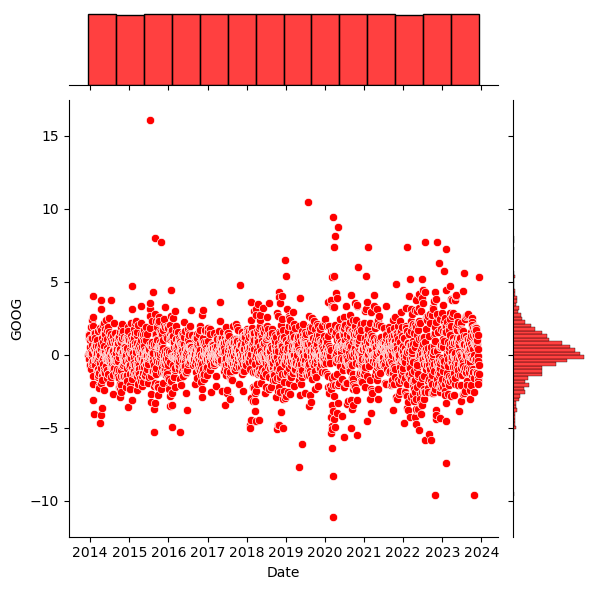

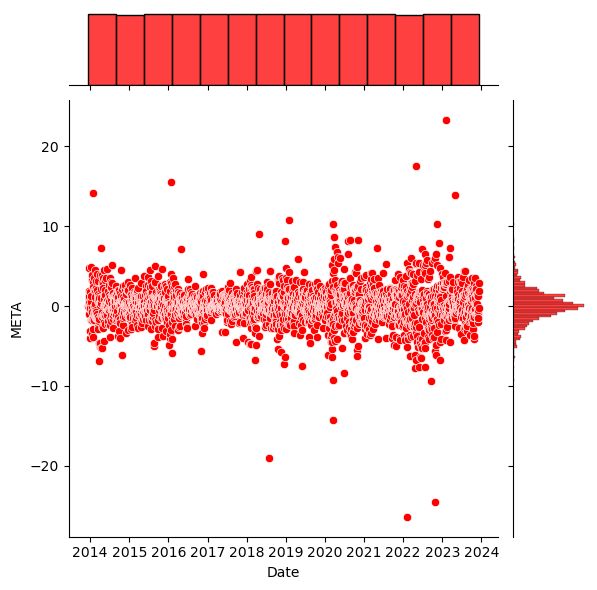

In [14]:
# a joinplot with percentage daily returns, date is constant 1 day
sns.jointplot(data=x, color = 'r', )
sns.jointplot(data=y, color = 'r', )

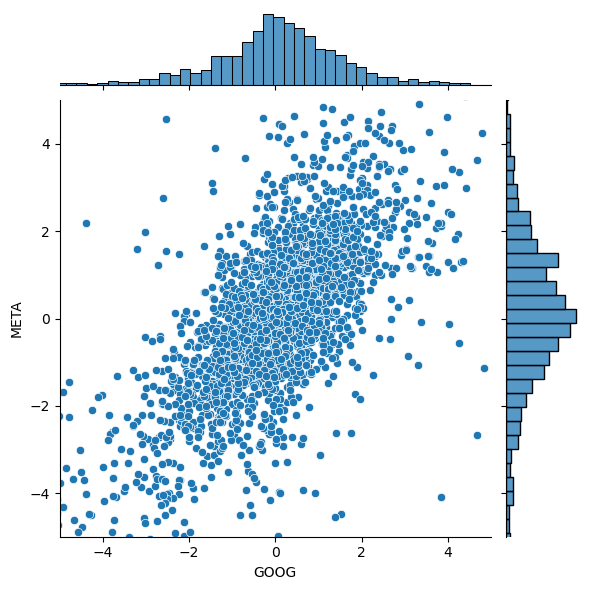

In [15]:
#joint 2 stocks into a scatter

sns.jointplot(x=x, y=y, xlim = {dlim, ulim}, ylim = {dlim, ulim})


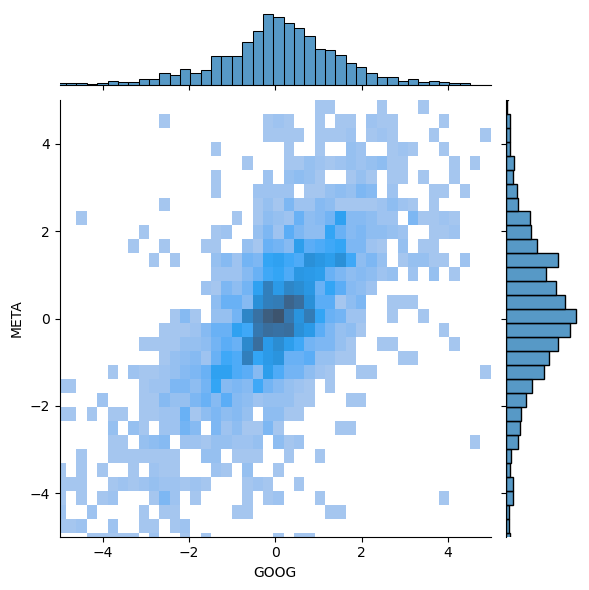

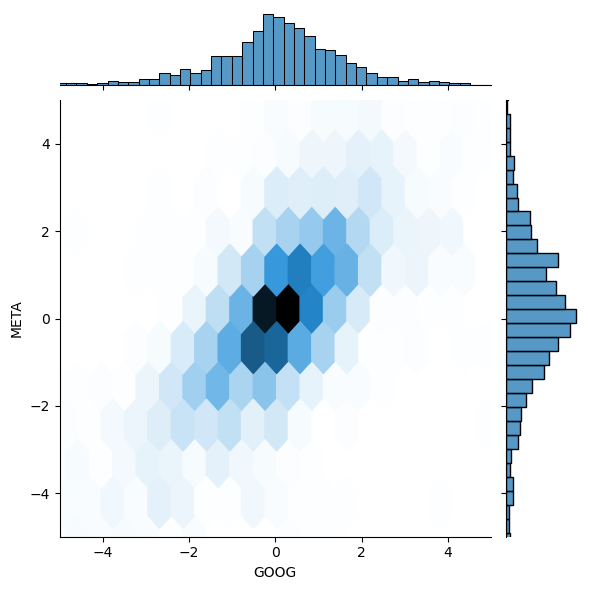

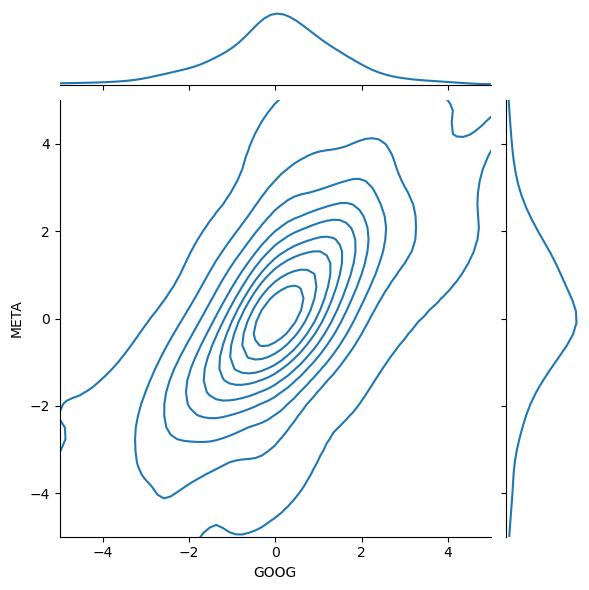

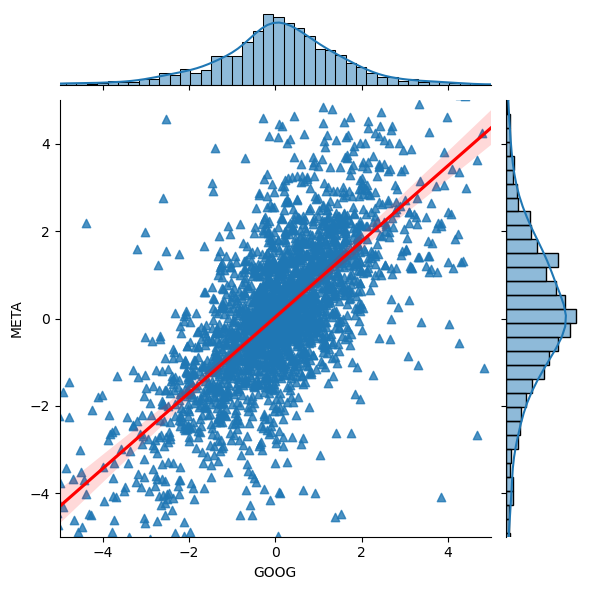

In [16]:
#Another plot types

sns.jointplot(x=x, y=y, kind="hist", xlim = {dlim, ulim}, ylim = {dlim, ulim})
sns.jointplot(x=x, y=y, kind="hex", xlim = {dlim, ulim}, ylim = {dlim, ulim})
sns.jointplot(x=x, y=y, kind="kde", xlim = {dlim, ulim}, ylim = {dlim, ulim})
sns.jointplot(x=x, y=y, kind="reg", line_kws=dict(color="r"), marker = "^", xlim = {dlim, ulim}, ylim = {dlim, ulim})

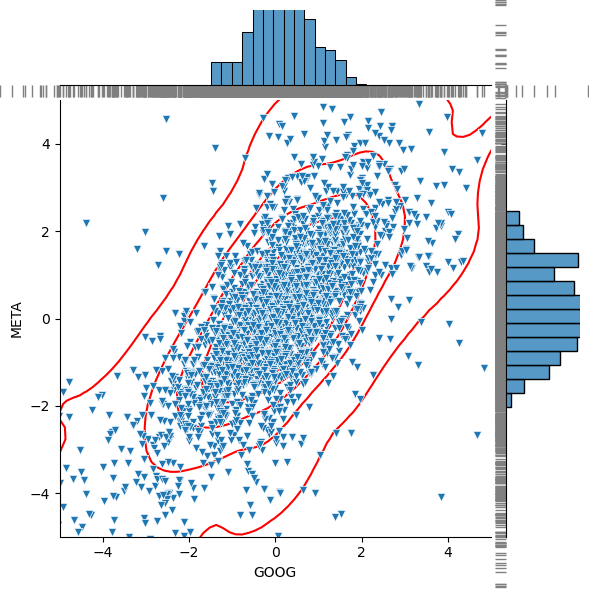

In [17]:
# Add more layers into the plot

g = sns.jointplot(x=x, y=y, marker = "v", xlim = {dlim, ulim}, ylim = {dlim, ulim})
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=8)
g.plot_marginals(sns.rugplot, color=".5", height=-.15, clip_on=False)


<Axes: xlabel='GOOG', ylabel='META'>

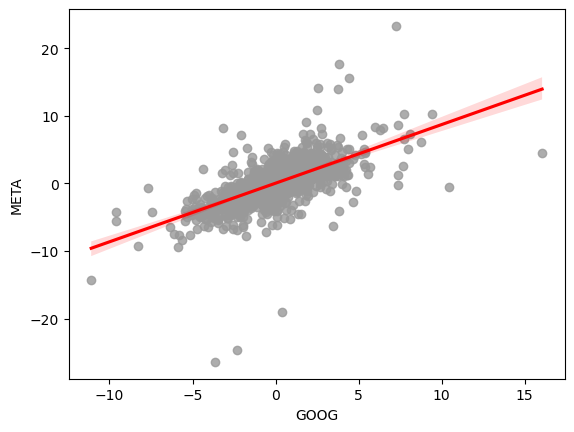

In [18]:
#perform a linear regression
    
sns.regplot(x=x, y=y
            # polinomial order to ajust regression
            , order = 1
            # confidence interval
            , ci=99
            #change color range saturation 0 black to 1 white
            , color=".6"
            # change color from regression line 'r' = red
            , line_kws=dict(color="r")
            # Fit a robust regression to downweight the influence of outliers
            #, robust=True
            
            )


## 5.3 Plot Entire Data Stocks

In [19]:
log_plotly_data(scaling_df, "Scaled Prices")

In [20]:
# Plot histograms for stocks daily returns using plotly express
fig = px.histogram(p_change_df)
fig.update_layout({'plot_bgcolor': "white"})

<Axes: >

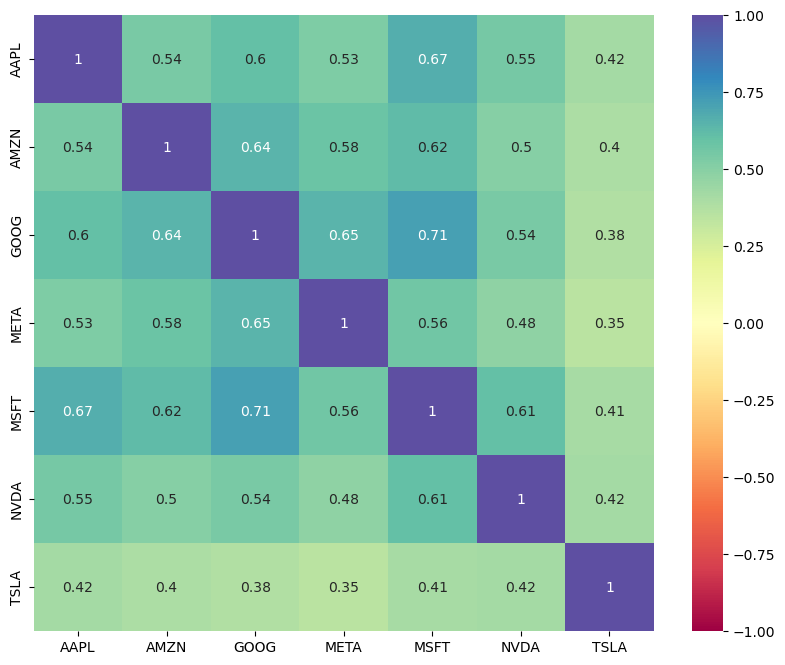

In [21]:
# Plot a heatmap showing the correlations between daily returns

plt.figure(figsize = (10, 8))
sns.heatmap(p_change_df.corr(), annot = True, vmin= -1, vmax= 1, cmap= "Spectral")

C:\Users\marqu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



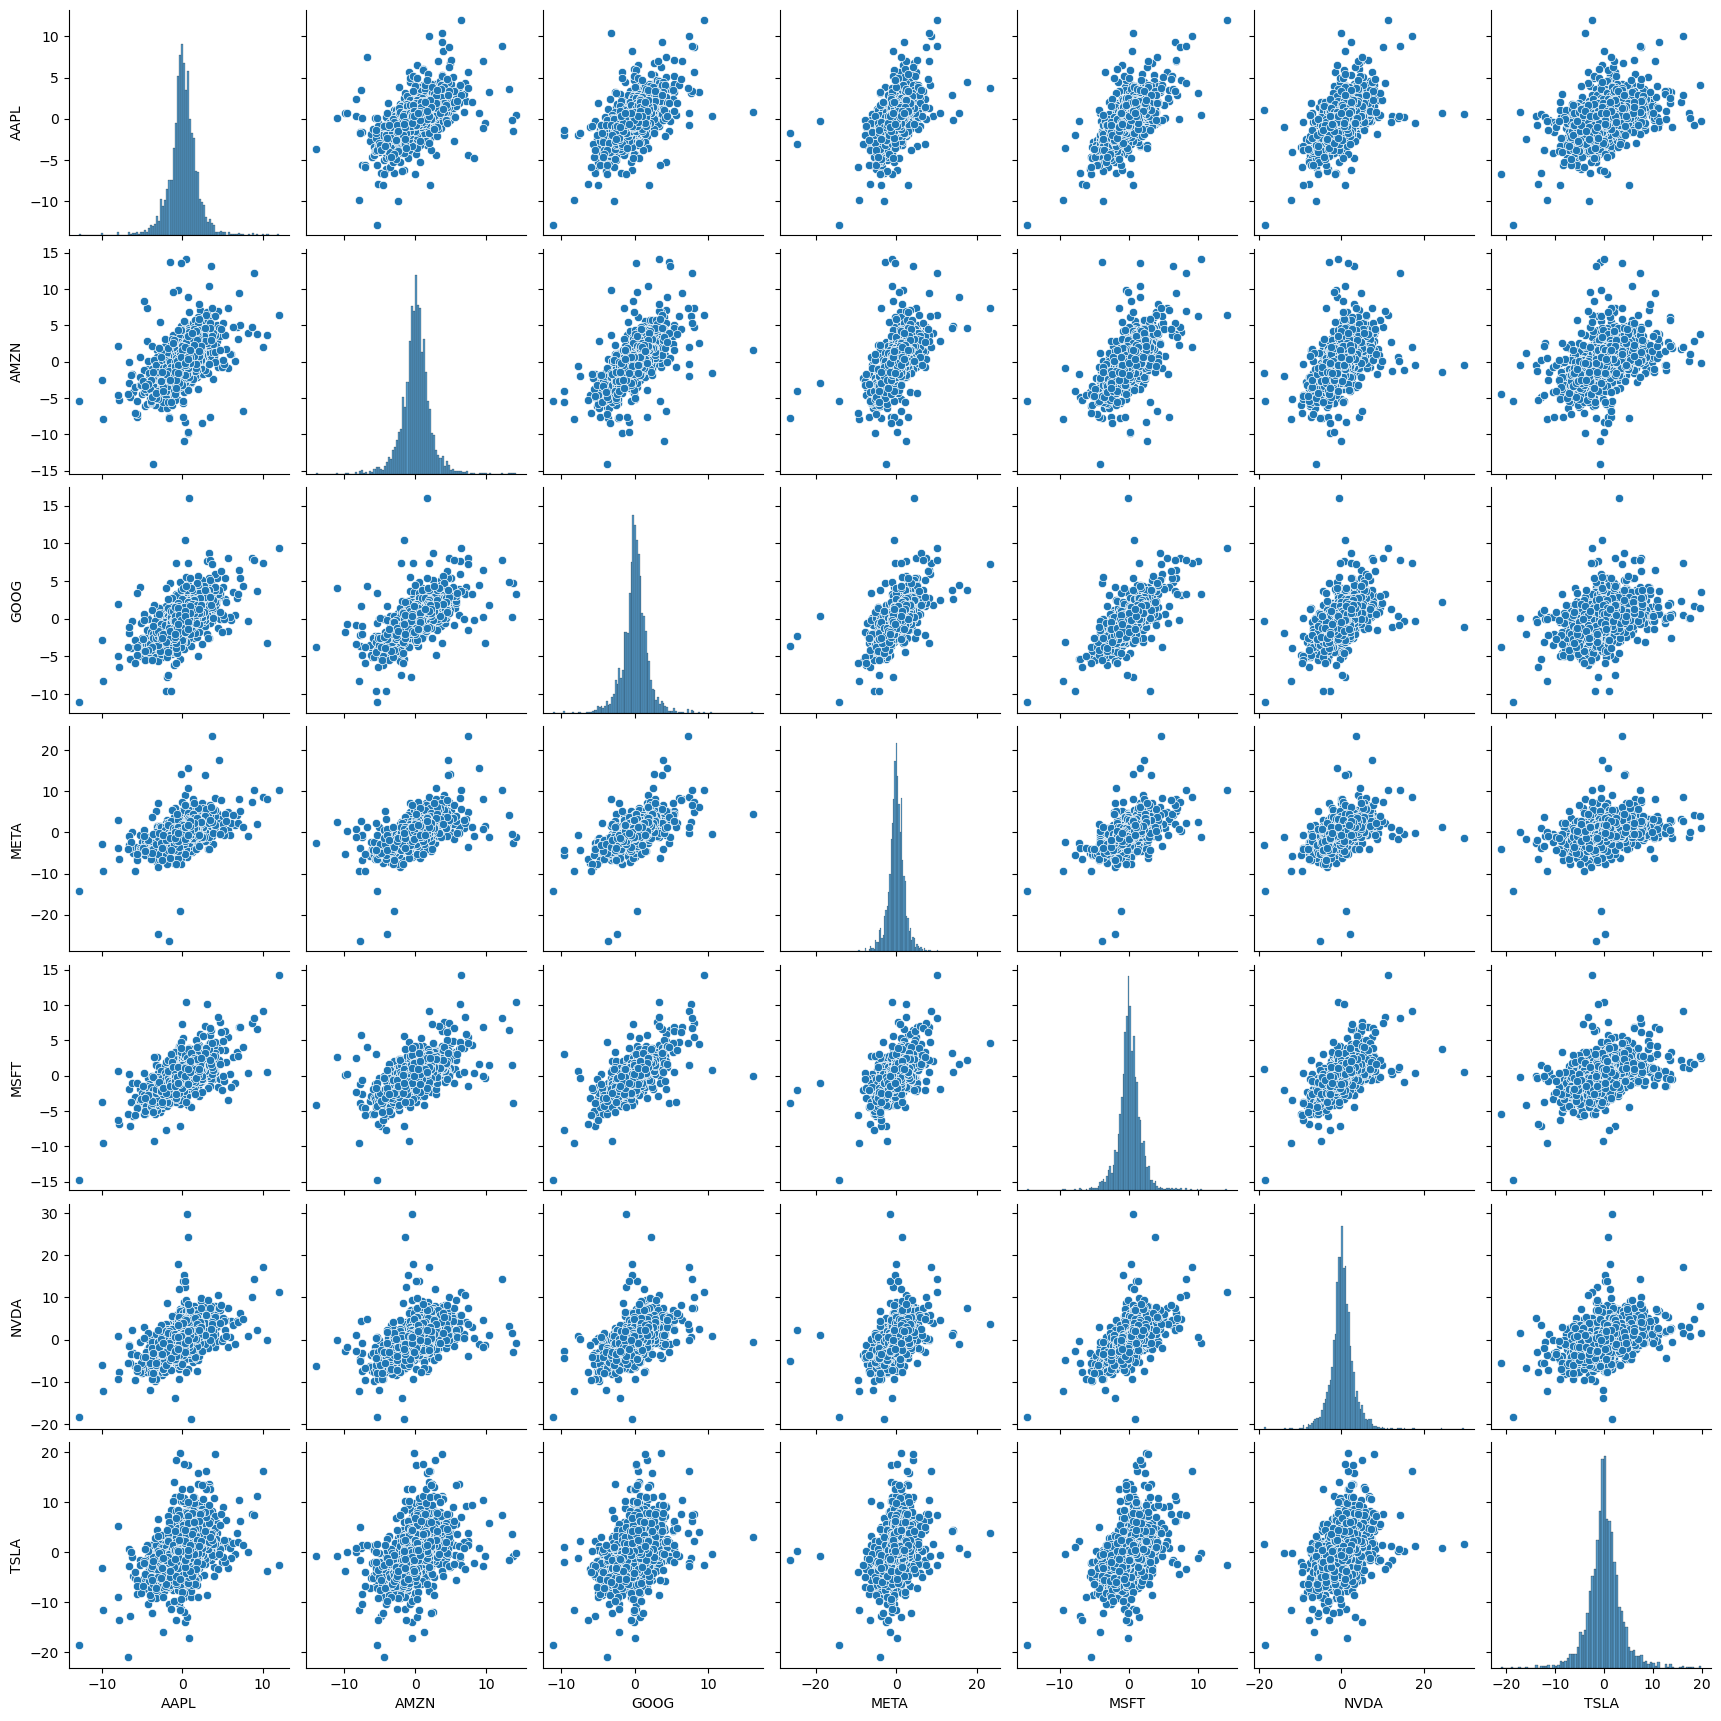

In [22]:
# Plot the Pairplot between stocks daily returns
sns.pairplot(p_change_df)

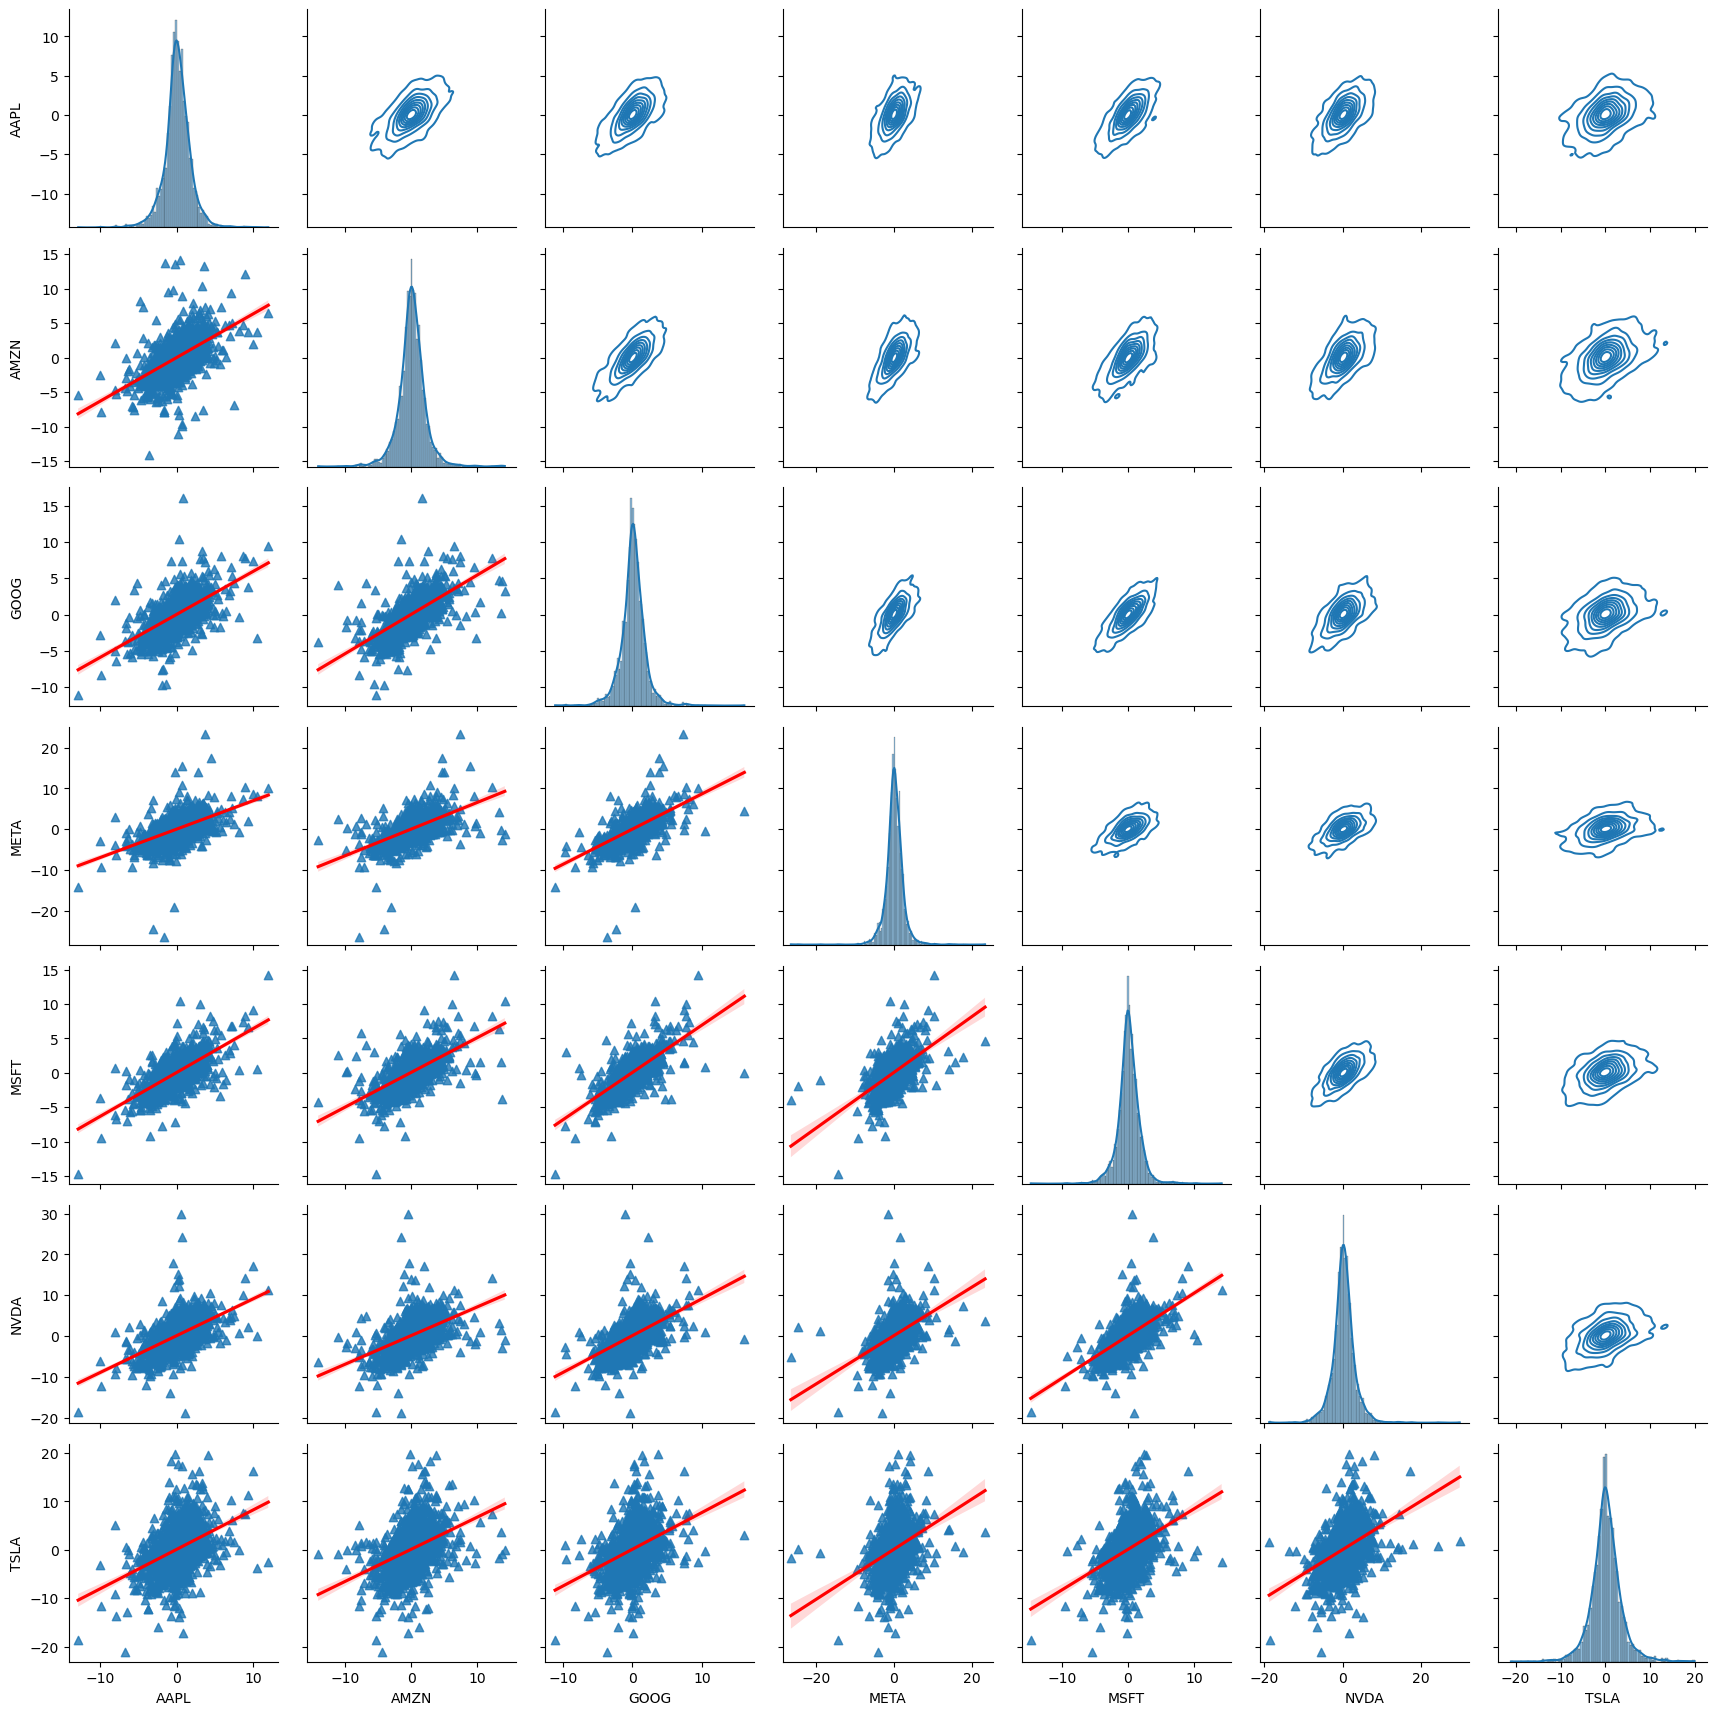

In [23]:

# Plot the Pairplot between stocks daily returns

g = sns.PairGrid(p_change_df, diag_sharey=False)
g.map_upper(sns.kdeplot)
g.map_lower(sns.regplot,line_kws=dict(color="r"), marker = "^")
g.map_diag(sns.histplot, kde=True, lw=2, )

